3. Disenar una capa entrenable que represente un polinomio grado 3: f(x) =a_0+a_1x+a_2x^2+a_3x^3.  Los parametros entrenables son los coeficientes a_0, a_1, a_2, a_3. Posteriormente, entrenarla para ajustarla a la funcion f(x)=cos(2x) en el intervalo [-1,1].

Importamos las librerias 

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import Adam
import numpy as np
import math
import matplotlib.pyplot as plt

Ahora diseñamos la capa entrenable que represente un polinomio de grado 3

In [24]:
class PolynomialLayer(Layer):
    def __init__(self, **kwargs):
        super(PolynomialLayer, self).__init__(**kwargs)

    def build(self, input_shape):# Define los parámetros entrenables del polinomio de grado 3: a0, a1, a2 y a3
        self.a0 = self.add_weight("a0", shape=(), initializer="zeros", trainable=True)
        self.a1 = self.add_weight("a1", shape=(), initializer="zeros", trainable=True)
        self.a2 = self.add_weight("a2", shape=(), initializer="zeros", trainable=True)
        self.a3 = self.add_weight("a3", shape=(), initializer="zeros", trainable=True)
        super(PolynomialLayer, self).build(input_shape)

    def call(self, x):
        # Calcula el polinomio de grado 3: f(x) = a0 + a1 * x + a2 * x^2 + a3 * x^3
        return self.a0 + self.a1 * x + self.a2 * x**2 + self.a3 * x**3


In [25]:
def objective(y_true, y_pred):
    return tf.losses.mean_squared_error(y_true, y_pred)

model = tf.keras.Sequential()
model.add(PolynomialLayer(input_shape=(1,)))
model.compile(optimizer=Adam(learning_rate=0.01), loss=objective)


In [26]:
x_train = np.linspace(-1, 1, 100)
y_train = np.cos(2 * x_train)

# Entrenamos el modelo
model.fit(x_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 2s 7ms/step - loss: 0.3933
Epoch 2/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.3593
Epoch 3/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.3338
Epoch 4/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.3074
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2874
Epoch 6/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2677
Epoch 7/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.2500
Epoch 8/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2334
Epoch 9/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.2174
Epoch 10/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.2026
Epoch 11/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1882
Epoch 12/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1735
Epoch 13/1000
4/4 [====================

4/4 [==============================] - 0s 6ms/step


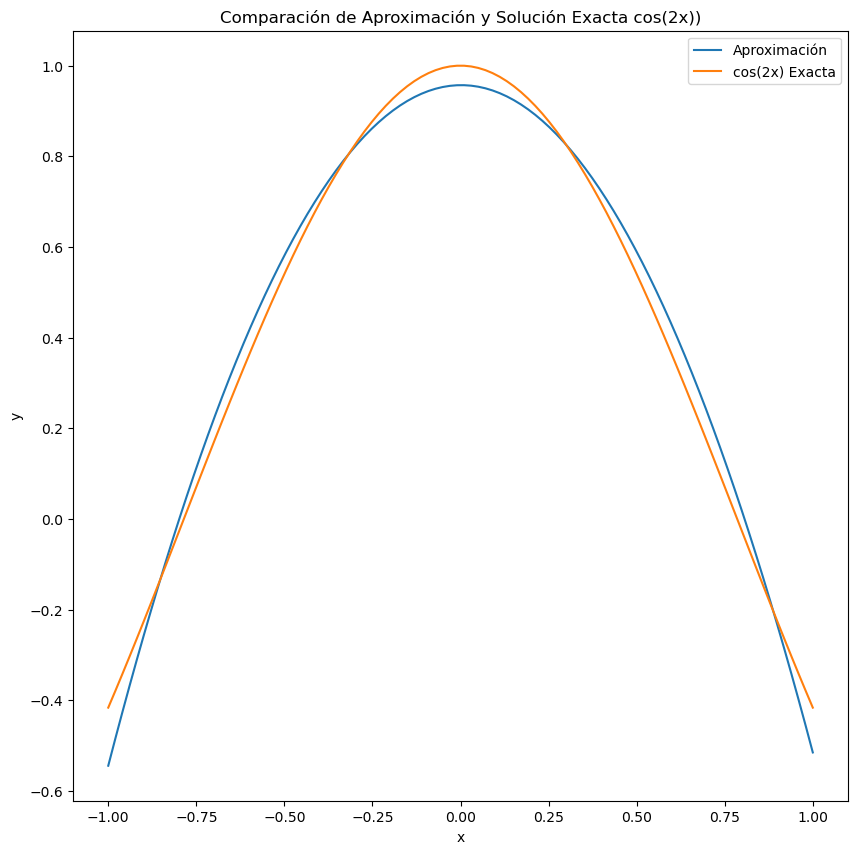

In [27]:
x_testv = tf.linspace(-1,1,100)# Generar datos de prueba en el rango [-1, 1]
a=model.predict(x_testv)# Obtener las predicciones del modelo
exact_solution = np.cos(2 * x_testv)

# Graficar las predicciones y la solución exacta
plt.figure(figsize = (10,10))
plt.plot(x_testv, a, label="Aproximación")
plt.plot(x_testv, exact_solution, label="cos(2x) Exacta")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de Aproximación y Solución Exacta cos(2x))')
plt.show()

In [ ]:
.